# Credit Risk Modeling


## 1 Data Preprocessing

### 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


### 1.2 Import Data

In [2]:
data_ = pd.read_csv('Model_Dataset.csv')
data = data_.copy()
data.shape

(373412, 24)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373412 entries, 0 to 373411
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              373412 non-null  int64  
 1   acc_open_past_24mths    373412 non-null  float64
 2   avg_cur_bal             373412 non-null  float64
 3   bc_open_to_buy          367952 non-null  float64
 4   delinq_2yrs             373412 non-null  float64
 5   dti                     371540 non-null  float64
 6   earliest_cr_line        371519 non-null  object 
 7   emp_title               351384 non-null  object 
 8   grade                   373412 non-null  object 
 9   inq_last_6mths          371549 non-null  float64
 10  issue_d                 373412 non-null  object 
 11  loan_amnt               373412 non-null  int64  
 12  mths_since_last_delinq  193106 non-null  float64
 13  num_tl_120dpd_2m        355867 non-null  float64
 14  percent_bc_gt_75    

In [4]:
#number of defaults
data['target'].value_counts()

target
0.0    298137
1.0     75275
Name: count, dtype: int64

In [5]:
data.isna().sum()

Unnamed: 0                     0
acc_open_past_24mths           0
avg_cur_bal                    0
bc_open_to_buy              5460
delinq_2yrs                    0
dti                         1872
earliest_cr_line            1893
emp_title                  22028
grade                          0
inq_last_6mths              1863
issue_d                        0
loan_amnt                      0
mths_since_last_delinq    180306
num_tl_120dpd_2m           17545
percent_bc_gt_75            3869
purpose                        0
revol_util                  2052
term                           0
total_acc                      0
verification_status            0
id                             0
target                         0
gender                         0
age                            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373412 entries, 0 to 373411
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              373412 non-null  int64  
 1   acc_open_past_24mths    373412 non-null  float64
 2   avg_cur_bal             373412 non-null  float64
 3   bc_open_to_buy          367952 non-null  float64
 4   delinq_2yrs             373412 non-null  float64
 5   dti                     371540 non-null  float64
 6   earliest_cr_line        371519 non-null  object 
 7   emp_title               351384 non-null  object 
 8   grade                   373412 non-null  object 
 9   inq_last_6mths          371549 non-null  float64
 10  issue_d                 373412 non-null  object 
 11  loan_amnt               373412 non-null  int64  
 12  mths_since_last_delinq  193106 non-null  float64
 13  num_tl_120dpd_2m        355867 non-null  float64
 14  percent_bc_gt_75    

In [7]:
#Categorical features numbers of emp_title is equal to 109246 which not explainable because we have 3000000
data['emp_title_cleaned'] = data['emp_title'].str.lower().str.strip()

# Check unique values after cleaning
unique_titles_cleaned = data['emp_title_cleaned'].nunique()
label_encoder = LabelEncoder()
data['emp_title_numeric'] = label_encoder.fit_transform(data['emp_title_cleaned'])
print(data[['emp_title_cleaned', 'emp_title_numeric']].head())

          emp_title_cleaned  emp_title_numeric
0                  engineer              27373
1                lieutenant              42900
2    facilities coordinator              29391
3             accts payable               1291
4  software testing analyst              72649


In [8]:
data['num_tl_120dpd_2m'][data['num_tl_120dpd_2m']==0].shape[0]/data['num_tl_120dpd_2m'].shape[0]
#we omit the feature as 95% is zero 
data = data.drop(columns='num_tl_120dpd_2m')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373412 entries, 0 to 373411
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              373412 non-null  int64  
 1   acc_open_past_24mths    373412 non-null  float64
 2   avg_cur_bal             373412 non-null  float64
 3   bc_open_to_buy          367952 non-null  float64
 4   delinq_2yrs             373412 non-null  float64
 5   dti                     371540 non-null  float64
 6   earliest_cr_line        371519 non-null  object 
 7   emp_title               351384 non-null  object 
 8   grade                   373412 non-null  object 
 9   inq_last_6mths          371549 non-null  float64
 10  issue_d                 373412 non-null  object 
 11  loan_amnt               373412 non-null  int64  
 12  mths_since_last_delinq  193106 non-null  float64
 13  percent_bc_gt_75        369543 non-null  float64
 14  purpose             

In [10]:
zero_col=[]
for column_name in data.columns:
    # Calculate total number of rows and count of zeros
    total_rows = len(data[column_name])
    zero_count = (data[column_name] == 0).sum()
    
    # Check if the number of zeros is at least two-thirds of the total rows
    if zero_count >= (90/100) * total_rows:
        zero_col.append(column_name)
print(zero_col)        
#we will not drop this feature even if this column is meaningless    

[]


In [11]:
columns_to_drop = ['id',  'gender','Unnamed: 0','emp_title_cleaned','emp_title']
#we drop 'emp_title' as it is remplaced by 'emp_title'
data.drop(columns=columns_to_drop, inplace=True, axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373412 entries, 0 to 373411
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   acc_open_past_24mths    373412 non-null  float64
 1   avg_cur_bal             373412 non-null  float64
 2   bc_open_to_buy          367952 non-null  float64
 3   delinq_2yrs             373412 non-null  float64
 4   dti                     371540 non-null  float64
 5   earliest_cr_line        371519 non-null  object 
 6   grade                   373412 non-null  object 
 7   inq_last_6mths          371549 non-null  float64
 8   issue_d                 373412 non-null  object 
 9   loan_amnt               373412 non-null  int64  
 10  mths_since_last_delinq  193106 non-null  float64
 11  percent_bc_gt_75        369543 non-null  float64
 12  purpose                 373412 non-null  object 
 13  revol_util              371360 non-null  float64
 14  term                

### Data distributions

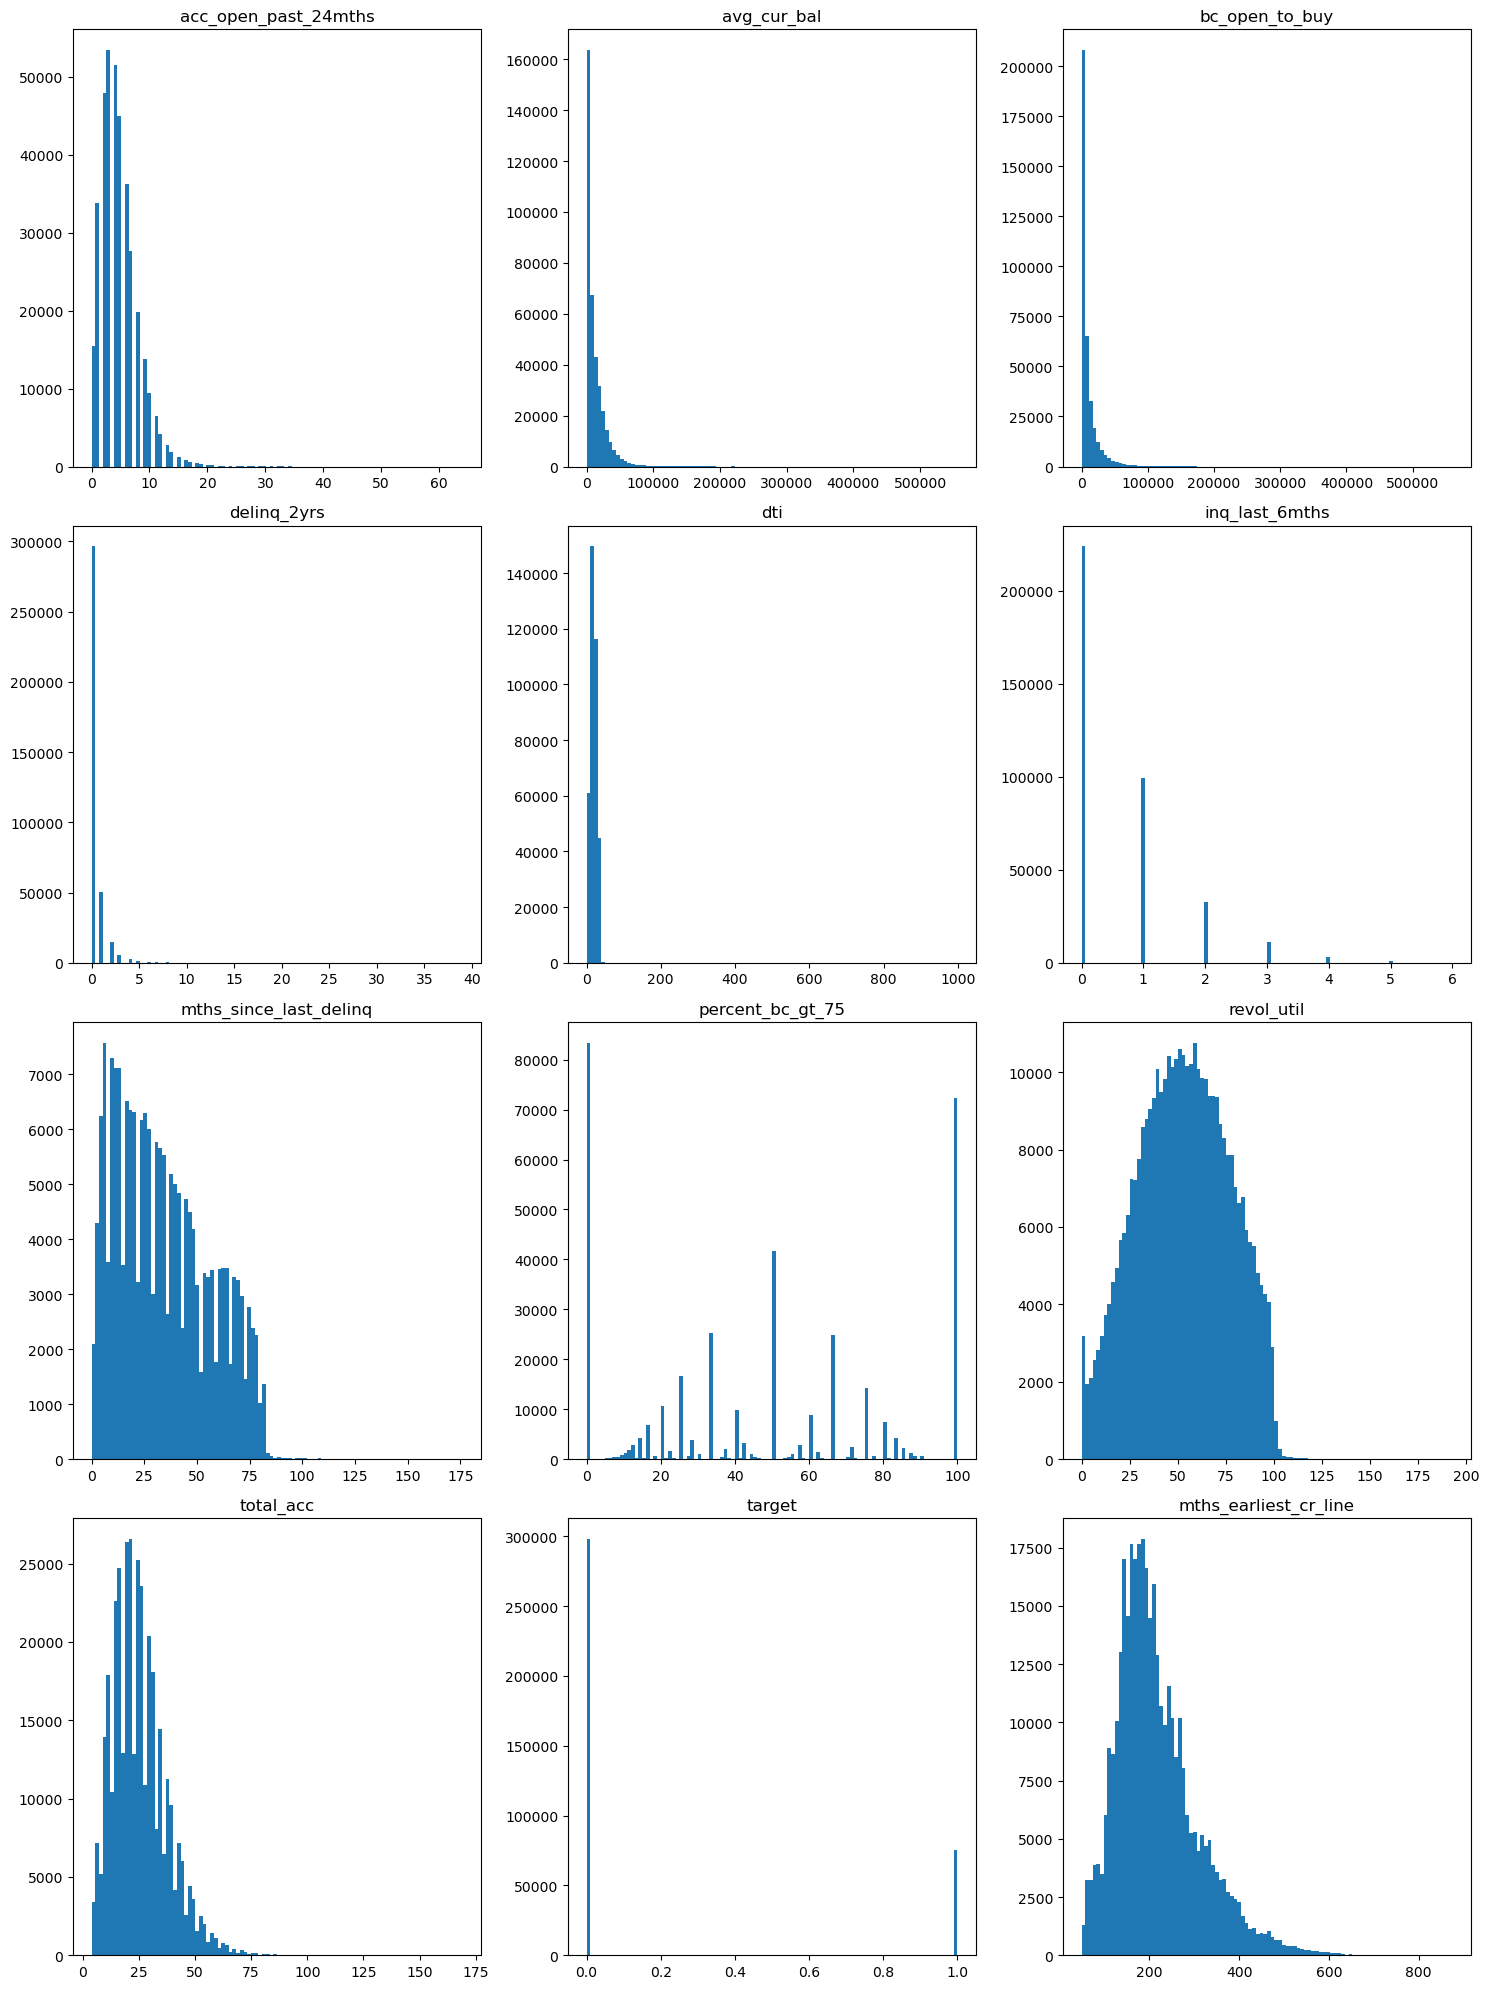

In [25]:
def plot_dist(df, columns_per_row=3):
    num_plots = len(df.columns)
    num_rows = (num_plots + columns_per_row - 1) // columns_per_row

    fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        axes[i].hist(df[column], bins=100)
        axes[i].set_title(f'{column}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

numerical = data.select_dtypes('float')
plot_dist(numerical, columns_per_row=3)

<span style="font-family: 'Verdana'; font-size: 24px; color: black;">1-3 Dates transformation.</span>


In [13]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
data['term'] = data['term'].str.replace(' ','')
data['term'] = data['term'].str.replace('months','')
data['term'] = pd.to_numeric(data['term'])
type(data['term'][0])

numpy.int64

In [15]:
end_date_str='Dec-2016'    
    # Convert the reference end date to datetime
end_date = pd.to_datetime(end_date_str, format="%b-%Y")

date_column='earliest_cr_line'
data[date_column] = pd.to_datetime(data[date_column], format="%b-%Y")

data['mths_'+date_column]=((end_date.year - data[date_column].dt.year) * 12 + (end_date.month - data[date_column].dt.month))


In [16]:
date_column='issue_d'
data[date_column] = pd.to_datetime(data[date_column], format="%Y-%m-%d")

data['mths_'+date_column]=((end_date.year - data[date_column].dt.year) * 12 + (end_date.month - data[date_column].dt.month))

In [17]:
#drop 'earliest_cr_line','issue_d' as they are remplaced by 'mths_earliest_cr_line','mths_issue_d'
columns_to_drop = ['earliest_cr_line','issue_d']
data.drop(columns=columns_to_drop, inplace=True, axis=1)



<span style="font-family: 'Verdana'; font-size: 36px; color: green;">2 Features selection .</span>

<span style="font-family: 'Verdana'; font-size: 36px; color: green;">2-1 Weight of Evidence, Information Value .</span>

<span style="font-family: 'Verdana'; font-size: 24px; color: green;">2-1-1 Categorical features.</span>

In [306]:
def woe_iv(cat_feature, good_bad_df):
    df = pd.concat([cat_feature, good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

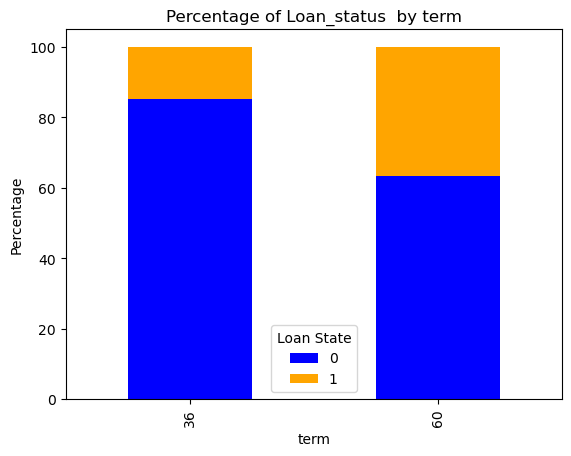

<Figure size 1800x1200 with 0 Axes>

In [307]:

counts = data.groupby(['term', 'target']).size().unstack(fill_value=0)

# Calculate the percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('Percentage of Loan_status  by term')
plt.xlabel('term')
plt.ylabel('Percentage')
plt.legend(title='Loan State', labels=['0', '1'])
plt.figure(figsize=(18, 12))
# Show the plot
plt.show()


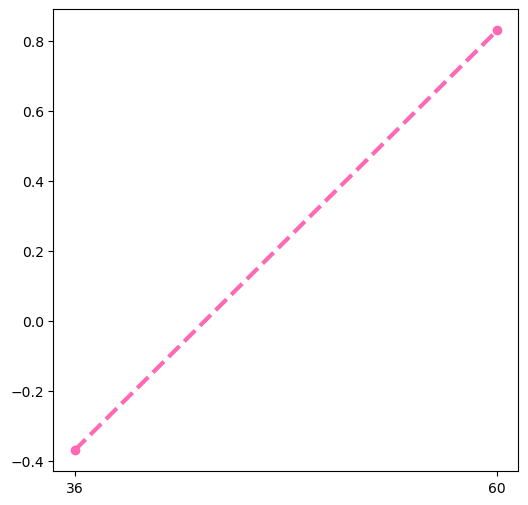

In [308]:
Y=data['target']  
X=data['term']
df=woe_iv(X, Y )
x = np.array(df.iloc[:, 0].apply(str))
y = df['WoE']
plt.figure(figsize=(6, 6))
plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3)

<span style="font-family: 'Verdana'; font-size: 18px; color: red;">IV[term36] < 0.02 so a weak predictor.</span>

In [309]:
data['purpose'].value_counts()



purpose
debt_consolidation    220714
credit_card            89583
home_improvement       22581
other                  17876
major_purchase          6699
medical                 3665
car                     3190
small_business          3068
moving                  2305
vacation                2186
house                   1326
renewable_energy         214
wedding                    4
educational                1
Name: count, dtype: int64

In [310]:
data = data[data['purpose'] != 'educational']



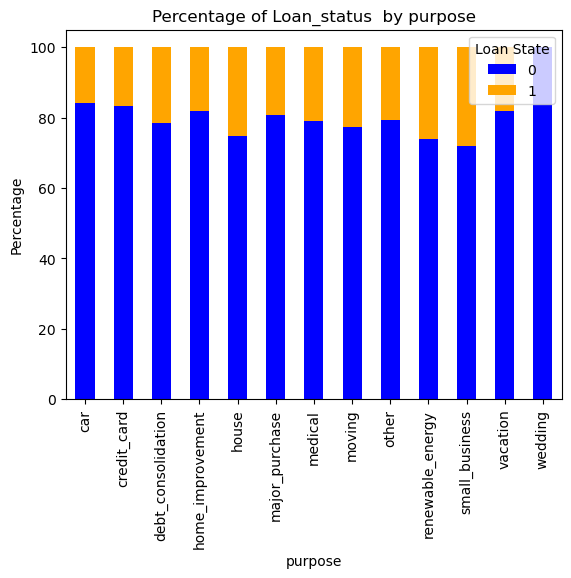

In [311]:
counts = data.groupby(['purpose', 'target']).size().unstack(fill_value=0)

# Calculate the percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('Percentage of Loan_status  by purpose')
plt.xlabel('purpose')
plt.ylabel('Percentage')
plt.legend(title='Loan State', labels=['0', '1'])

# Show the plot
plt.show()

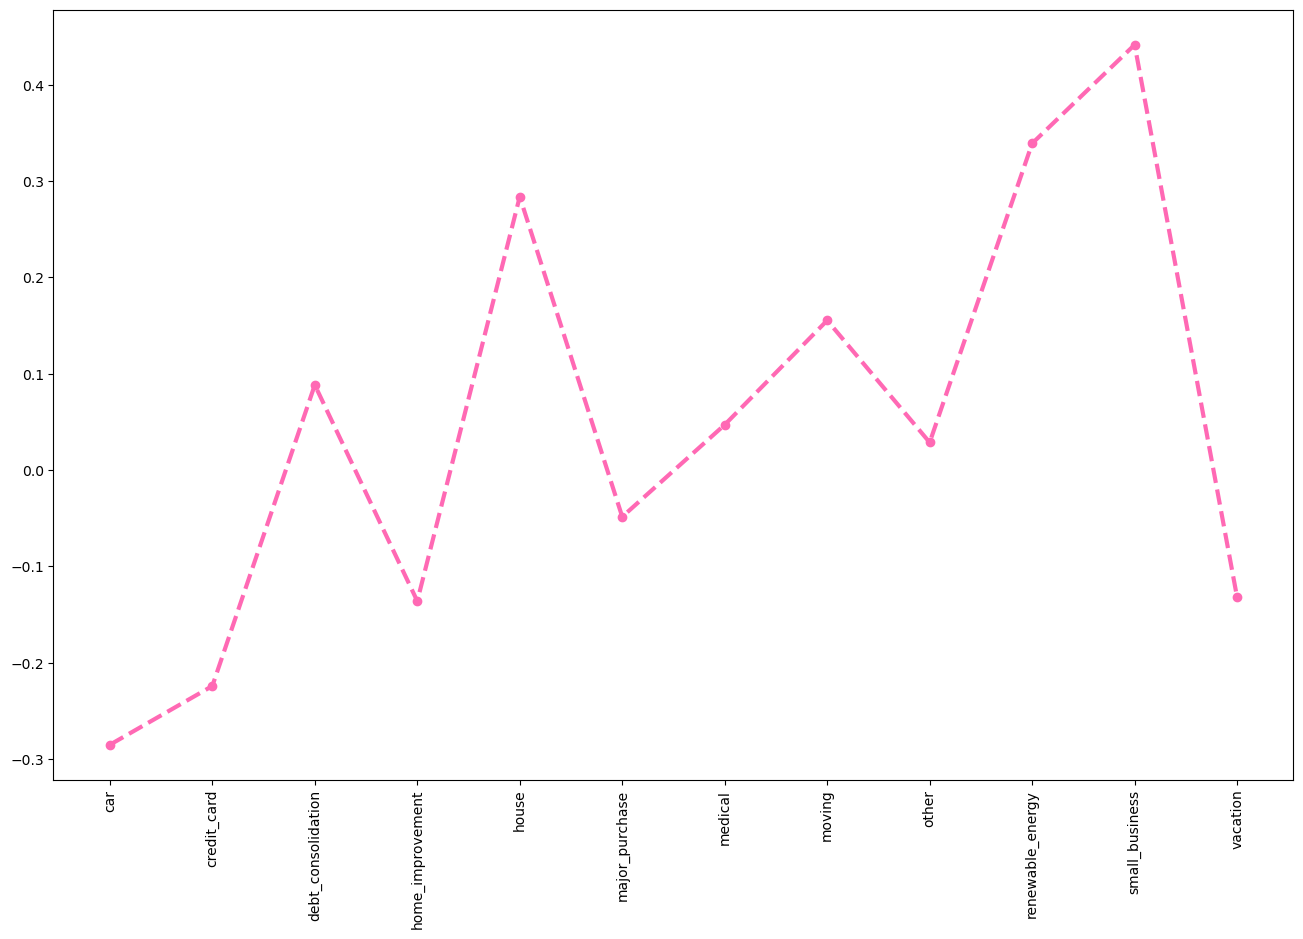

In [312]:
Y=data['target']  
X=data['purpose']
df=woe_iv(X, Y )
x = np.array(df.iloc[:, 0].apply(str))
y = df['WoE']
plt.figure(figsize=(16, 10))
plt.xticks(rotation=90)
plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3)

<span style="font-size: 22px;">IV[purpose_car] < 0.02 : a weak predictor</span><br>
<span style="font-size: 22px;">IV[purpose_vacation] < 0.02 : a weak predictor</span><br>
<span style="font-size: 22px;">IV[purpose_credit_card] < 0.02 : a weak predictor</span><br>
<span style="font-size: 22px;">IV[purpose_home_improvement] < 0.02 : a weak predictor</span><br>
<span style="font-size: 22px;">IV[purpose_major_purchase] < 0.02 : a weak predictor</span><br>
<span style="font-size: 22px;">IV[purpose_other] < 0.02 : a weak predictor</span><br>

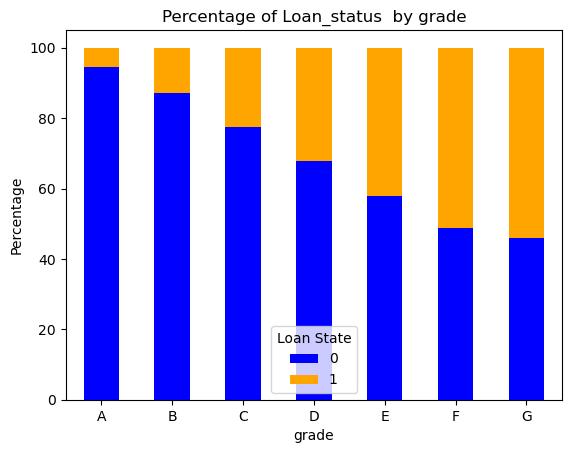

In [313]:
counts = data.groupby(['grade', 'target']).size().unstack(fill_value=0)

# Calculate the percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('Percentage of Loan_status  by grade')
plt.xlabel('grade')
plt.ylabel('Percentage')
plt.legend(title='Loan State', labels=['0', '1'])
plt.xticks(rotation=0)
# Show the plot
plt.show()

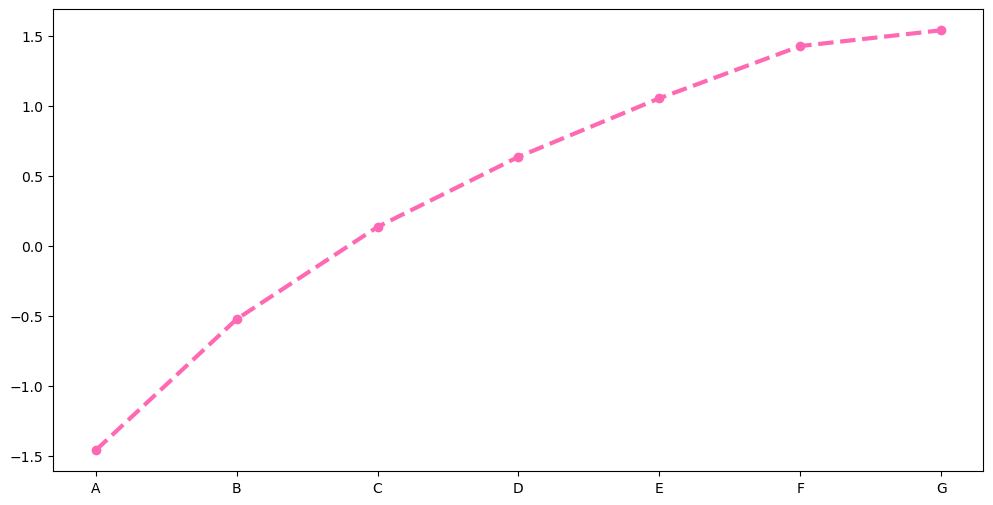

In [314]:
Y=data['target']  
X=data['grade']
df=woe_iv(X, Y )
x = np.array(df.iloc[:, 0].apply(str))
y = df['WoE']
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3)

<span style="font-size: 22px;">IV[grade_A] < 0.02 : a weak predictor</span><br>
<span style="font-size: 22px;">IV[grade_B] < 0.02 : a weak predictor : a weak predictor</span><br>

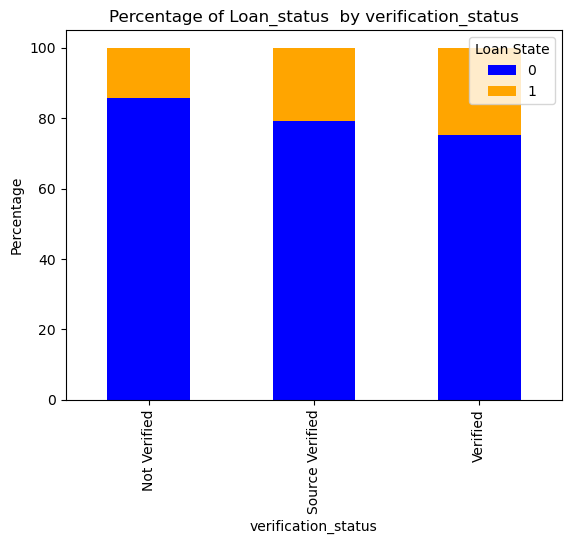

In [315]:
counts = data.groupby(['verification_status', 'target']).size().unstack(fill_value=0)

# Calculate the percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('Percentage of Loan_status  by verification_status')
plt.xlabel('verification_status')
plt.ylabel('Percentage')
plt.legend(title='Loan State', labels=['0', '1'])

# Show the plot
plt.show()

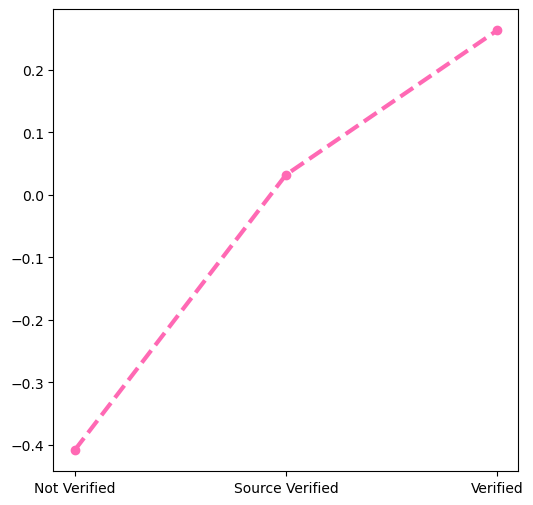

In [316]:
Y=data['target']  
X=data['verification_status']
df=woe_iv(X, Y )
x = np.array(df.iloc[:, 0].apply(str))
y = df['WoE']
plt.figure(figsize=(6, 6))
plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3)


<span style="font-size: 22px;">IV[Not Verified] < 0.02 : a weak predictor</span><br>


<span style="font-family: 'Verdana'; font-size: 24px; color: green;">2-1-2 Continuous features.</span>

In [317]:
def iv_woe(data, feature, target, bins):
    # Create a dataframe for binning the feature
    df = pd.DataFrame()
    df['feature'] = data[feature]
    df['target'] = data[target]

    # Bin the independent feature using pd.qcut
    df['bin'] = pd.qcut(df['feature'], bins, duplicates='drop')

    # Create a table with the count of events and non-events for each bin
    good_bad_df = df.groupby('bin')['target'].agg(['count', 'sum'])
    good_bad_df.columns = ['total', 'events']
    good_bad_df['non_events'] = good_bad_df['total'] - good_bad_df['events']

    # Calculate the total number of events and non-events
    total_events = good_bad_df['events'].sum()
    total_non_events = good_bad_df['non_events'].sum()

    # Calculate event rate and non-event rate per bin
    good_bad_df['event_rate'] = good_bad_df['events'] / total_events
    good_bad_df['non_event_rate'] = good_bad_df['non_events'] / total_non_events

    # Calculate WoE (Weight of Evidence)
    good_bad_df['woe'] = np.log(good_bad_df['event_rate'] / good_bad_df['non_event_rate'])

    # Calculate IV (Information Value)
    good_bad_df['iv'] = (good_bad_df['event_rate'] - good_bad_df['non_event_rate']) * good_bad_df['woe']
    good_bad_df = good_bad_df.reset_index() 
    # Calculate total IV
    iv = good_bad_df['iv'].sum()

    # Show WoE table if requested

    return iv,good_bad_df[['bin', 'events', 'non_events', 'woe', 'iv']]

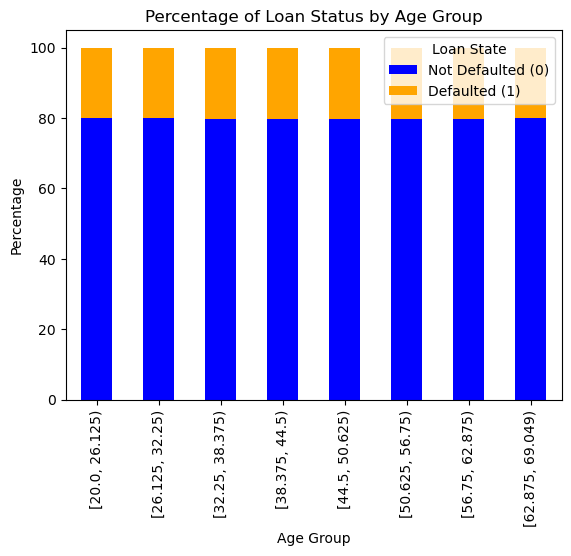

In [318]:
df=pd.DataFrame()
df['age_bins'] = pd.cut(data['age'], bins=8, right=False)
df['target']=data['target']
# Group by age bins and target to get counts
counts = df.groupby(['age_bins', 'target']).size().unstack(fill_value=0)

# Calculate the percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('Percentage of Loan Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Loan State', labels=['Not Defaulted (0)', 'Defaulted (1)'])

# Show the plot
plt.show()

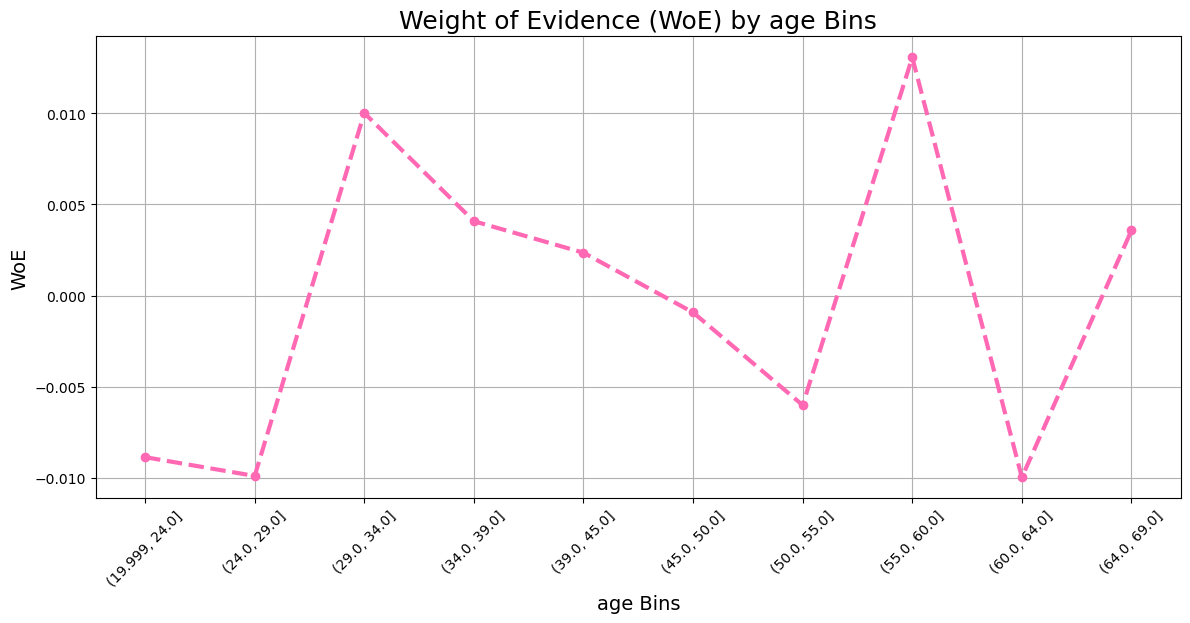

In [319]:
iv,df=iv_woe(data, 'age', 'target', 10)
x = df['bin']
y = df['woe']
x = df['bin'].astype(str)  
y = df['woe']


plt.figure(figsize=(14, 6))
plt.plot(x, y, marker='o', color='hotpink', linestyle='dashed', linewidth=3)

plt.title('Weight of Evidence (WoE) by age Bins', fontsize=18)
plt.xlabel('age Bins', fontsize=14)
plt.ylabel('WoE', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<span style="font-size: 22px;">IV[Not age] < 0.02 : a weak predictor</span><br>


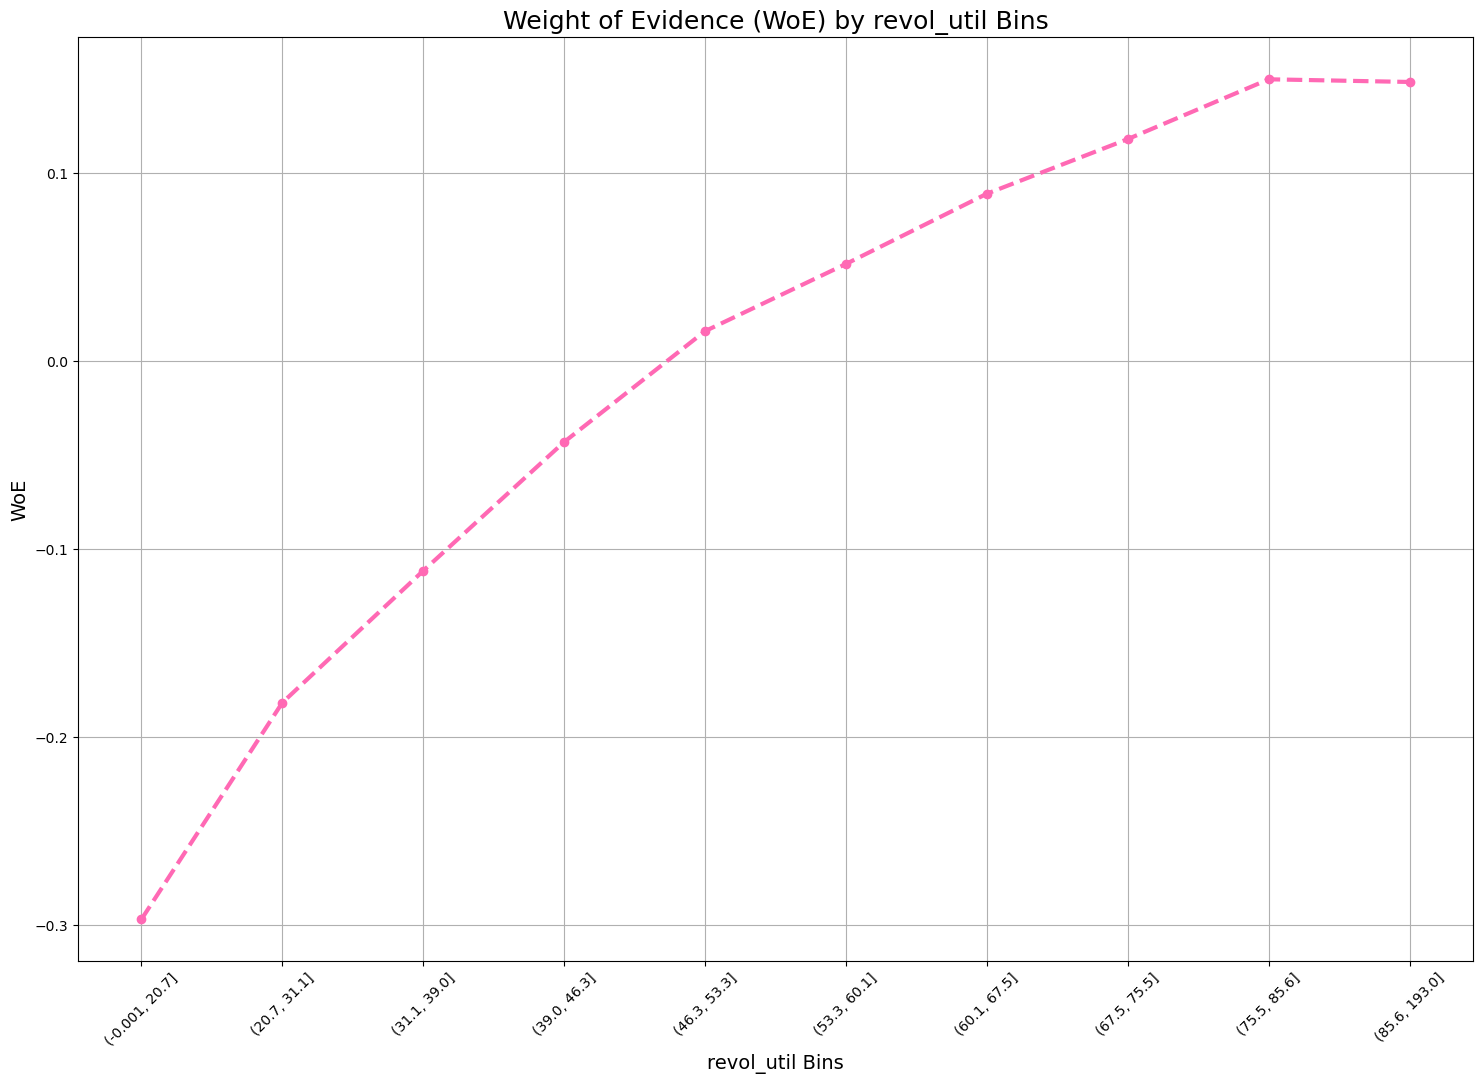

In [320]:
iv,df=iv_woe(data, 'revol_util', 'target', 10)

x = df['bin']
y = df['woe']
x = df['bin'].astype(str)  
y = df['woe']


plt.figure(figsize=(18, 12))
plt.plot(x, y, marker='o', color='hotpink', linestyle='dashed', linewidth=3)

plt.title('Weight of Evidence (WoE) by revol_util Bins', fontsize=18)
plt.xlabel('revol_util Bins', fontsize=14)
plt.ylabel('WoE', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [321]:
#threshold = 0.7 * len(data)  # 70% of the number of rows

# Drop columns with more than 70% missing values
#data = data.dropna(axis=1, thresh=threshold)

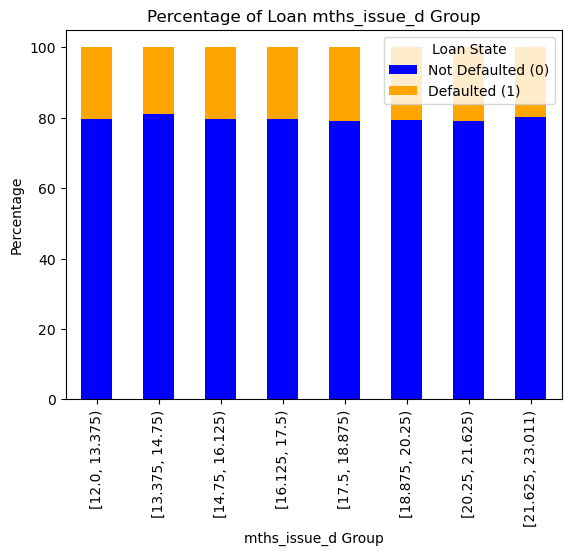

In [322]:
df=pd.DataFrame()
df['mths_issue_d_bins'] = pd.cut(data['mths_issue_d'], bins=8, right=False)
df['target']=data['target']
# Group by age bins and target to get counts
counts = df.groupby(['mths_issue_d_bins', 'target']).size().unstack(fill_value=0)

# Calculate the percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('Percentage of Loan mths_issue_d Group')
plt.xlabel('mths_issue_d Group')
plt.ylabel('Percentage')
plt.legend(title='Loan State', labels=['Not Defaulted (0)', 'Defaulted (1)'])

# Show the plot
plt.show()

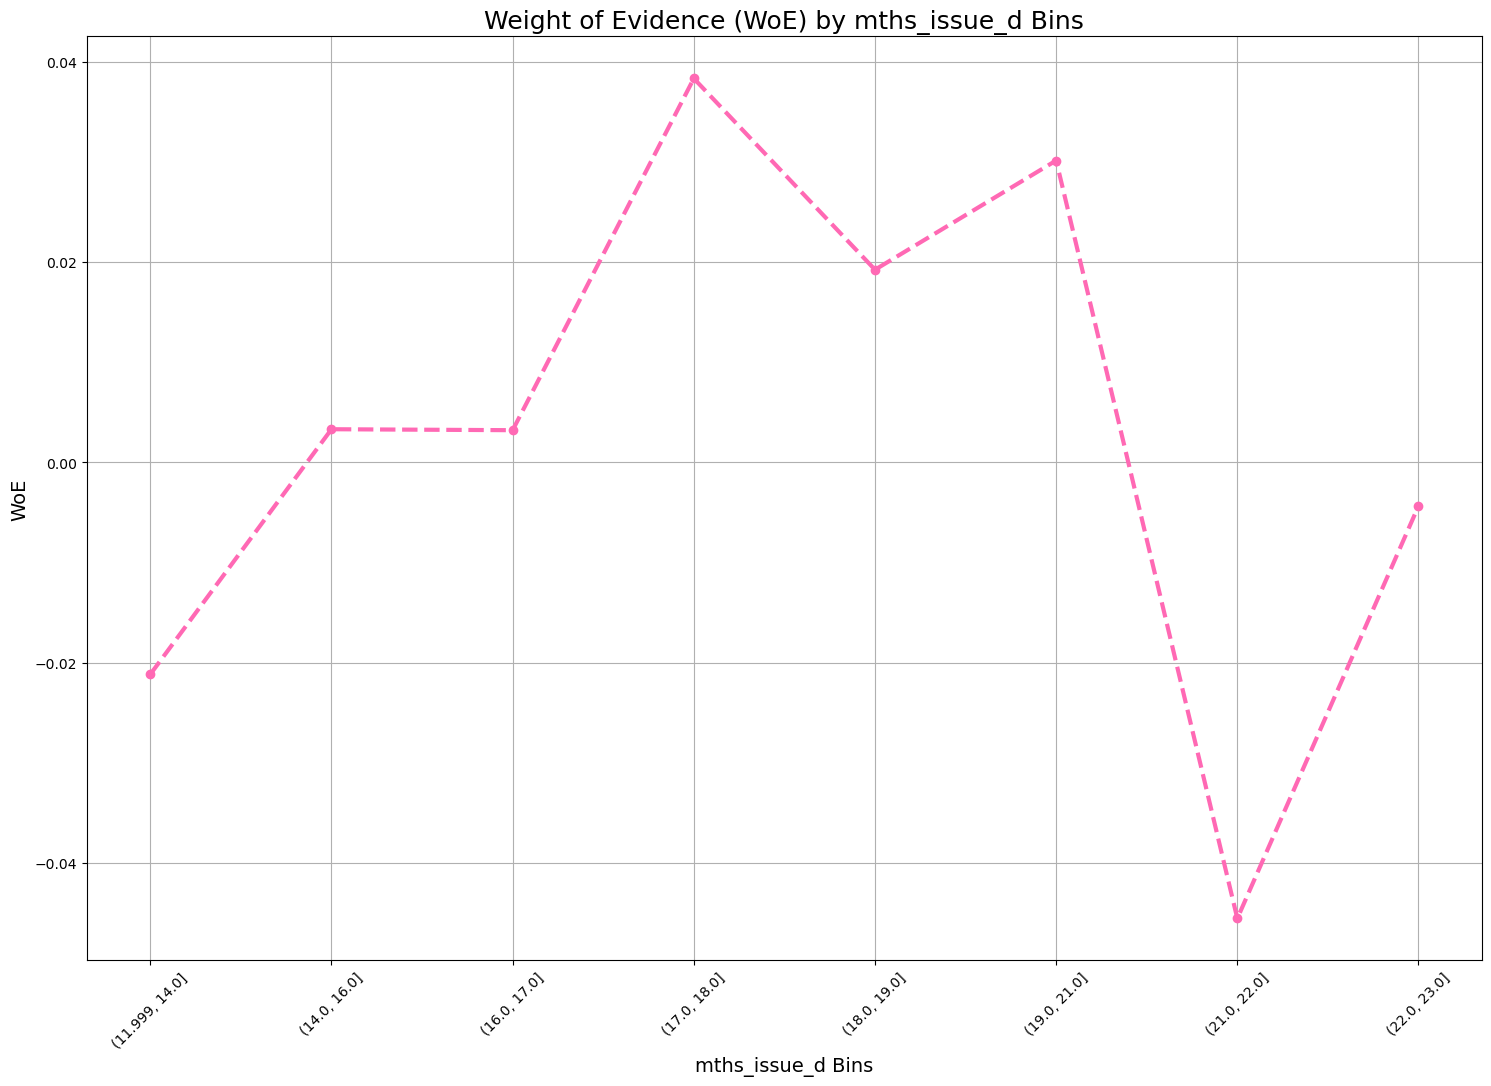

In [323]:
iv,df=iv_woe(data, 'mths_issue_d', 'target', 10)

x = df['bin']
y = df['woe']
x = df['bin'].astype(str)  
y = df['woe']


plt.figure(figsize=(18, 12))
plt.plot(x, y, marker='o', color='hotpink', linestyle='dashed', linewidth=3)

plt.title('Weight of Evidence (WoE) by mths_issue_d Bins', fontsize=18)
plt.xlabel('mths_issue_d Bins', fontsize=14)
plt.ylabel('WoE', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<span style="font-size: 22px;">IV[mth_issue_d] is not a strong predictor </span><br>


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373411 entries, 0 to 373411
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   acc_open_past_24mths    373411 non-null  float64
 1   avg_cur_bal             373411 non-null  float64
 2   bc_open_to_buy          367951 non-null  float64
 3   delinq_2yrs             373411 non-null  float64
 4   dti                     371539 non-null  float64
 5   grade                   373411 non-null  object 
 6   inq_last_6mths          371548 non-null  float64
 7   loan_amnt               373411 non-null  int64  
 8   mths_since_last_delinq  193105 non-null  float64
 9   percent_bc_gt_75        369542 non-null  float64
 10  purpose                 373411 non-null  object 
 11  revol_util              371359 non-null  float64
 12  term                    373411 non-null  int64  
 13  total_acc               373411 non-null  float64
 14  verification_status     3

## 3 Hot Encoding of categorical features, and correlation

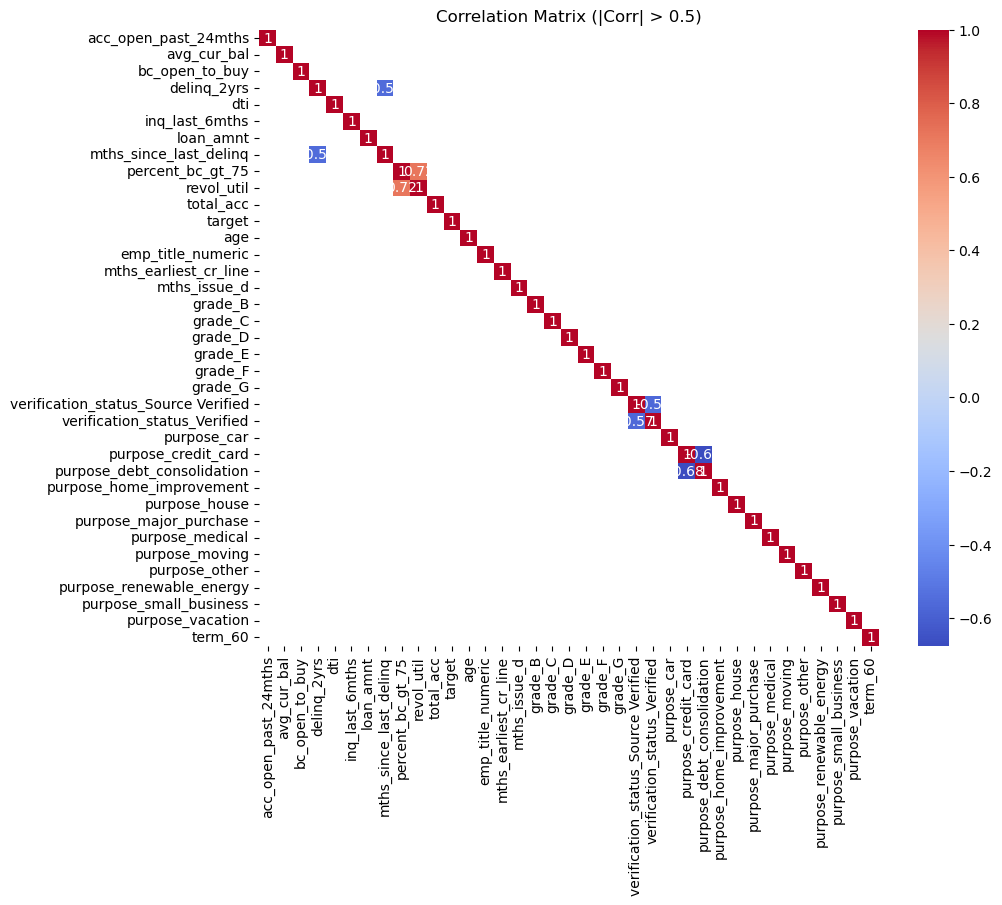

In [325]:

dummies = ['grade', 'verification_status', 'purpose','term']
data = pd.get_dummies(data, columns=dummies)
col=['grade_A','verification_status_Not Verified', 'term_36','purpose_wedding']
data=data.drop(columns=col)
corr = data.corr()

# Step 2: Filter the matrix to only show correlations > 0.7
corr_filtered = corr[(corr > 0.5) | (corr < -0.5)]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', mask=corr_filtered.isnull())
plt.title('Correlation Matrix (|Corr| > 0.5)')
plt.show()


In [26]:
### transform boolean objects to integers
data.loc[:, data.dtypes == 'bool'] = data.loc[:, data.dtypes == 'bool'].astype(int)


<span style="font-size: 32px; color: green;">2-2 VIF</span><br>


- **Definition**: 
  The Variance Inflation Factor (VIF) quantifies the severity of multicollinearity in a regression analysis by measuring how much the variance of a regression coefficient is inflated due to correlation with other independent variables.

- **Formula**: 
  $$
  VIF_i = \frac{1}{1 - R^2_i}
  $$
  Where $R^2_i$ is the $R^2$ value obtained by regressing the $i^{th}$ independent variable against all other independent variables.

- **Interpretation**:
  - VIF = 1: No correlation between the variable and others.
  - $1 < \text{VIF} < 5$: Moderate correlation; acceptable.
  - $\text{VIF} \geq 5$: High correlation; could be problematic.
  - $\text{VIF} \geq 10$: Indicates strong multicollinearity; needs attention.


In [328]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Options: 'mean', 'median', 'most_frequent', 'constant'

# Apply imputer to the DataFrame
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X=data.copy().drop(columns=['target'])
y=data['target']

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                feature        VIF
0                  acc_open_past_24mths   5.109478
1                           avg_cur_bal   1.925548
2                        bc_open_to_buy   2.273701
3                           delinq_2yrs   1.252197
4                                   dti   6.654959
5                        inq_last_6mths   1.713731
6                             loan_amnt   6.021020
7                mths_since_last_delinq   2.086914
8                      percent_bc_gt_75   5.384224
9                            revol_util  13.327516
10                            total_acc   8.866718
11                                  age  10.495838
12                    emp_title_numeric   4.332127
13                mths_earliest_cr_line   7.851187
14                         mths_issue_d  25.651085
15                              grade_B   2.838090
16                              grade_C   3.419931
17                              grade_D   2.593540
18                             

<span style="font-size: 22px; color:green;">
VIF suggests to remove 'purpose_debt_consolidation', 'purpose_credit_card', 'mth_issue_d', 'revol_util', 'age'</span><br>


<span style="font-size: 32px; color: green;">2-3 ANOVA Features selections</span><br>

In [330]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

def remove_correlated_features(df, correlation_threshold):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()  # Use absolute values for correlation

    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with a correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

    print(f"Features to drop: {to_drop}")
    
    # Drop the correlated features from the original dataframe
    return to_drop
selector = VarianceThreshold(threshold=0)  # Remove zero variance features
X_cleaned = selector.fit_transform(X)  # Keep the transformed data
X_cleaned = pd.DataFrame(X_cleaned, columns=X.columns[selector.get_support()])  # Preserve column names

# 2. Remove highly correlated features
to_drop = remove_correlated_features(X_cleaned, 0.75)
X_cleaned = X_cleaned.drop(columns=to_drop)

# 3. Perform statistical test (ANOVA)
# Here we use ANOVA F-value with SelectKBest
select_k_best = SelectKBest(score_func=f_classif, k='all')  # You can use mutual_info_classif as well
X_selected = select_k_best.fit_transform(X_cleaned, y)

# 4. Get feature scores
feature_scores = select_k_best.scores_
print(f"ANOVA feature scores: {feature_scores}")

# 5. Get the feature names of the selected features
selected_indices = select_k_best.get_support(indices=True)  # Get the indices of selected features
selected_feature_names = X_cleaned.columns[selected_indices]  # Use the indices to get feature names

# Print the selected features
print("Selected features:")
print(selected_feature_names)

Features to drop: []
ANOVA feature scores: [6.18941028e+03 2.26745136e+03 2.74130338e+03 8.82871542e+01
 4.93188677e+03 2.84967501e+03 1.56520130e+03 3.39473322e+01
 1.76995015e+03 1.08332149e+03 4.78371420e+01 9.05661470e-02
 3.58675198e+01 7.14434893e+02 1.62929353e+00 4.79659168e+03
 4.57919296e+02 5.73272798e+03 9.29307900e+03 5.06498474e+03
 1.36031610e+03 4.84906139e+01 2.02711533e+03 3.53109057e+01
 8.32295175e+02 7.17257762e+02 6.58225952e+01 2.02953040e+01
 2.49848328e+00 1.35973017e+00 9.87547074e+00 2.54038003e+00
 4.80449344e+00 1.24141317e+02 5.70494508e+00 2.14687986e+04]
Selected features:
Index(['acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'delinq_2yrs',
       'dti', 'inq_last_6mths', 'loan_amnt', 'mths_since_last_delinq',
       'percent_bc_gt_75', 'revol_util', 'total_acc', 'age',
       'emp_title_numeric', 'mths_earliest_cr_line', 'mths_issue_d', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'verification_status_Source 

<span style="font-size: 32px; color: green;">2-2Backward stepwise Logistic Regression</span><br>

In [266]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# Assuming X is your DataFrame with predictors and y is the target variable
# Add a constant (intercept) to the model

X = sm.add_constant(X)
initial_model = sm.Logit(y, X).fit()

# Define a function for backward stepwise selection based on AIC
def backward_stepwise_aic(X, y):
    current_model = sm.Logit(y, X).fit(disp=False)
    current_aic = current_model.aic
    best_aic = current_aic
    best_model = current_model
    best_X = X
    columns_removed=[]
    while True:
        aic_with_removal = {}
        
        # Try removing each feature and calculate the AIC
        for column in X.columns:
            if column == 'const':  # Don't remove the intercept
                continue
            reduced_X = X.drop(columns=[column])
            reduced_model = sm.Logit(y, reduced_X).fit(disp=False)
            aic_with_removal[column] = reduced_model.aic
        
        # Find the feature whose removal results in the lowest AIC
        best_column_to_remove = min(aic_with_removal, key=aic_with_removal.get)
        best_aic_after_removal = aic_with_removal[best_column_to_remove]

        # If the AIC improves, remove the feature and update the model
        if best_aic_after_removal < best_aic:
            print(f"Removing {best_column_to_remove} improves AIC to {best_aic_after_removal}")
            best_aic = best_aic_after_removal
            X = X.drop(columns=[best_column_to_remove])
            columns_removed.append(best_column_to_remove)
            best_model = sm.Logit(y, X).fit(disp=False)
        else:
            # Stop if no further AIC improvement
            break
    
    return best_model,columns_removed
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    
model,col=backward_stepwise_aic(X_train, y_train)    
    

         Current function value: 0.445213
         Iterations: 35
Removing purpose_house improves AIC to 266881.2784978555
Removing purpose_vacation improves AIC to 266879.9482171334
Removing purpose_car improves AIC to 266878.9692702728
Removing purpose_other improves AIC to 266878.2379983068
Removing purpose_medical improves AIC to 266876.7373920671
Removing purpose_renewable_energy improves AIC to 266876.4791063541
Removing purpose_home_improvement improves AIC to 266876.16163047106
Removing mths_earliest_cr_line improves AIC to 266876.0559998184
Removing age improves AIC to 266876.00430786976



<span style="font-size: 32px; color: green;">Backward stepwise Logistic regression had removed columns 'purpose_renewable_energy', 'purpose_other', 'purpose_house', 
'purpose_moving', 'purpose_car', 'purpose_vacation', 'age'</span><br>

In [282]:
len(data['emp_title_numeric'].unique()) 

87344

In [283]:
#delete the column 'emp_title_numeric' because a categorical column with a lot of type of jobs and it affects accuracy 80% to 60%
#data=data.drop(columns=['emp_title_numeric'])

<span style="font-size: 32px; color: green;">Data Balancing</span><br>

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

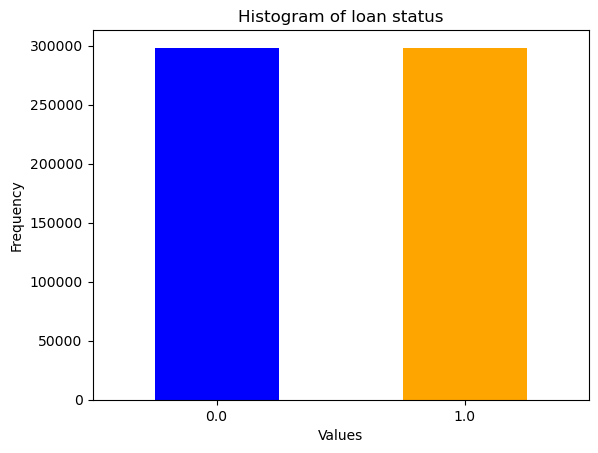

In [331]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
#we can choose 'underbalanced', 'overbalanced','unbalanced'
def Balancing_data(type_of_balance,X,y):
    if type_of_balance=='underbalance':
        rus = RandomUnderSampler(random_state=42)
        X, y= rus.fit_resample(X, y)
    elif type_of_balance=='overbalance':
        smote = BorderlineSMOTE()
        X, y = smote.fit_resample(X, y)
    return X,y
X=data.copy().drop(columns=['target'])
y=data['target']
X,y=Balancing_data('overbalance',X,y)
value_counts = y.value_counts()
value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Histogram of loan status')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

<span style="font-size: 32px; color: green;">3 Classification Algorithms</span><br>

<span style="font-size: 22px; color: green;">XGBoost</span><br>

In [272]:
def XG(X_train, X_test, y_train, y_test):
    # Calculate class imbalance ratio (negative/positive)
    neg_pos_ratio = y.value_counts()[0] / y.value_counts()[1]
    
    # Train an XGBoost Classifier with scale_pos_weight
    xgb_clf = XGBClassifier(random_state=42, scale_pos_weight=neg_pos_ratio)
    xgb_clf.fit(X_train, y_train)
    
    # Predict probabilities for ROC curve
    y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
    y_pred = xgb_clf.predict(X_test)
    # metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    aucpr = average_precision_score(y_test, y_pred_prob)
    aucroc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)    
    # Plot ROC Curve for the selected features model
    fpr_top, tpr_top, thresholds_top = roc_curve(y_test, y_pred_prob)
    roc_auc_top = auc(fpr_top, tpr_top)
    return xgb_clf,fpr_top, tpr_top, roc_auc_top,precision,accuracy,recall,f1,aucpr,aucroc

<span style="font-size: 32px; color: green;">RandomForest</span><br>

In [273]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay


# Assuming your dataset is already loaded as 'data_D'

def RandForest(X_train, X_test, y_train, y_test):
    # Split data into training and testing sets
    
    # Train a Random Forest Classifier
    xgb_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
    xgb_clf.fit(X_train, y_train)
    
    
    y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    y_pred = xgb_clf.predict(X_test)
    
    #metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    aucpr = average_precision_score(y_test, y_pred_prob)
    aucroc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC Curve 
    fpr_top, tpr_top, thresholds_top = roc_curve(y_test, y_pred_prob)
    roc_auc_top = auc(fpr_top, tpr_top)
    return xgb_clf,fpr_top, tpr_top, roc_auc_top,precision,accuracy,recall,f1,aucpr,aucroc




<span style="font-size: 32px; color: green;">LGBM</span><br>

In [274]:
# Import necessary libraries
from lightgbm import LGBMClassifier

# Assuming your dataset is already loaded as 'data_D'
def LGBM(X_train, X_test, y_train, y_test):    

    
 
    
    # Train a LightGBM Classifier
    xgb_clf = LGBMClassifier(random_state=42)
    xgb_clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    y_pred = xgb_clf.predict(X_test)
    #metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    aucpr = average_precision_score(y_test, y_pred_prob)
    aucroc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    #Roc curve
    fpr_top, tpr_top, thresholds_top = roc_curve(y_test, y_pred_prob)
    roc_auc_top = auc(fpr_top, tpr_top)
    
 
    return xgb_clf,fpr_top, tpr_top, roc_auc_top,precision,accuracy,recall,f1,aucpr,aucroc


<span style="font-size: 32px; color: green;">CatBoost</span><br>

In [275]:
from catboost import CatBoostClassifier, Pool




def Catboost(X_train, X_test, y_train, y_test):    
    # Initialize CatBoost Classifier
    xgb_clf = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_seed=42, verbose=100)
    
    # Train the model
    xgb_clf.fit(X_train, y_train)
    
    # Predict probabilities for ROC curve
    y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    y_pred = xgb_clf.predict(X_test)
    #metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    aucpr = average_precision_score(y_test, y_pred_prob)
    aucroc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    #Roc curve
    fpr_top, tpr_top, thresholds_top = roc_curve(y_test, y_pred_prob)
    roc_auc_top = auc(fpr_top, tpr_top)
    return xgb_clf,fpr_top, tpr_top, roc_auc_top,precision,accuracy,recall,f1,aucpr,aucroc


<span style="font-size: 32px; color: green;">Logistic Regression </span><br>

In [276]:
from sklearn.linear_model import LogisticRegression


def LogisticRegres(X_train, X_test, y_train, y_test ):   
    print(y_test.shape)
    xgb_clf = LogisticRegression(solver='newton-cg')
    xgb_clf.fit(X_train, y_train)
    y_preds = xgb_clf.predict(X_test)
    #classification report
    #print(classification_report(y_test, y_preds))
    # Predict on the test set
    y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    y_pred = xgb_clf.predict(X_test)
    
    
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    aucpr = average_precision_score(y_test, y_pred_prob)
    aucroc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    # Plot ROC Curve for the selected features model
    fpr_top, tpr_top, thresholds_top = roc_curve(y_test, y_pred_prob)
    roc_auc_top = auc(fpr_top, tpr_top)
    return xgb_clf,fpr_top, tpr_top, roc_auc_top,precision,accuracy,recall,f1,aucpr,aucroc



<span style="font-size: 32px; color: green;">ANN</span><br>

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming your dataset is already loaded as 'data_D'


# Split the data into training and testing sets
def ANN(X_train, X_test, y_train, y_test ):
    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Build the ANN model with 3 hidden layers
    model = Sequential()
    
    # Input layer
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Adjust number of input dimensions
    
    # Hidden layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Early stopping for preventing overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Handling class imbalance using class weights
    neg, pos = np.bincount(y_train)
    total = neg + pos
    class_weight = {0: (1 / neg) * (total / 2.0), 1: (1 / pos) * (total / 2.0)}
    
    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=512,
                        class_weight=class_weight, callbacks=[early_stopping])
    y_pred_prob = model.predict(X_test)  # Get predicted probabilities
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    aucpr = average_precision_score(y_test, y_pred_prob)
    aucroc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    return model,fpr, tpr, roc_auc,precision,accuracy,recall,f1,aucpr,aucroc




2024-10-03 11:55:51.783638: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<span style="font-size: 22px; color: green;">Confusion Matrix and features selection</span><br>

In [278]:
def confusion_mat(model,X_test,y_test,name_model):
    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name_model} on Test Set')
    plt.show()
def features_select(model,X,name_model):
    importances = model.feature_importances_
    features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    features = features.sort_values(by='Importance', ascending=False)
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(features['Feature'], features['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance {name_model}')
    plt.gca().invert_yaxis()
    plt.show()

<span style="font-size: 32px; color: green;">Application of classification algorithms on the dataset</span><br>

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
y.shape

(596272,)

In [366]:
print(f"{'Model':<20} | {'Precision':<10} | {'Accuracy':<10} |{'Recall':<10} | {'F1 Score':<10} | {'AUCPR':<10} | {'AUC-ROC':<10}")
lreg,fpr_Log, tpr_Log, roc_auc_Log,precision,accuracy,recall,f1,aucpr,aucroc=LogisticRegres(X_train, X_test, y_train, y_test)
print(f"{'Logistic regression':<20} | {precision:<10.2f}  | {accuracy:<10.2f} | {recall:<10.2f} | {f1:<10.2f} | {aucpr:<10.2f} | {aucroc:<10.2f}")


Model                | Precision  | Accuracy   |Recall     | F1 Score   | AUCPR      | AUC-ROC   
Logistic regression  | 0.68        | 0.69       | 0.69       | 0.69       | 0.72       | 0.75      


In [340]:
print(f"{'Model':<20} | {'Precision':<10} | {'Accuracy':<10} |{'Recall':<10} | {'F1 Score':<10} | {'AUCPR':<10} | {'AUC-ROC':<10}")
xgb,fpr_XG, tpr_XG, roc_auc_XG,precision,accuracy,recall,f1,aucpr,aucroc=XG(X_train, X_test, y_train, y_test)
print(f"{'XGBoost':<20} | {precision:<10.2f} | {accuracy:<10.2f} |{recall:<10.2f} | {f1:<10.2f} | {aucpr:<10.2f} | {aucroc:<10.2f}")

Model                | Precision  | Accuracy   |Recall     | F1 Score   | AUCPR      | AUC-ROC   
XGBoost              | 0.96       | 0.88       |0.79       | 0.87       | 0.95       | 0.93      


In [341]:
catb,fpr_Catboost, tpr_Catboost, roc_auc_Catboost,precision,accuracy,recall,f1,aucpr,aucroc=Catboost(X_train, X_test, y_train, y_test)
print(f"{'Model':<20} | {'Precision':<10} | {'Accuracy':<10} |{'Recall':<10} | {'F1 Score':<10} | {'AUCPR':<10} | {'AUC-ROC':<10}")
print(f"{'CatBoost':<20} | {precision:<10.2f} | {accuracy:<10.2f} |{recall:<10.2f} | {f1:<10.2f} | {aucpr:<10.2f} | {aucroc:<10.2f}")

0:	learn: 0.5802410	total: 81.6ms	remaining: 40.7s
100:	learn: 0.2858513	total: 8.33s	remaining: 32.9s
200:	learn: 0.2803925	total: 16.1s	remaining: 24s
300:	learn: 0.2771696	total: 23.4s	remaining: 15.5s
400:	learn: 0.2747185	total: 31.5s	remaining: 7.77s
499:	learn: 0.2722597	total: 39.5s	remaining: 0us
Model                | Precision  | Accuracy   |Recall     | F1 Score   | AUCPR      | AUC-ROC   
CatBoost             | 0.97       | 0.88       |0.79       | 0.87       | 0.95       | 0.94      


In [342]:
lgbm,fpr_LGBM, tpr_LGBM, roc_auc_LGBM,precision,accuracy,recall,f1,aucpr,aucroc=LGBM(X_train, X_test, y_train, y_test)
print(f"{'Model':<20} | {'Precision':<10} | {'Accuracy':<10} |{'Recall':<10} | {'F1 Score':<10} | {'AUCPR':<10} | {'AUC-ROC':<10}")
print(f"{'LGBM':<20} | {precision:<10.2f} | {accuracy:<10.2f} |{recall:<10.2f} | {f1:<10.2f} | {aucpr:<10.2f} | {aucroc:<10.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 238603, number of negative: 238414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8966
[LightGBM] [Info] Number of data points in the train set: 477017, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500198 -> initscore=0.000792
[LightGBM] [Info] Start training from score 0.000792
Model                | Precision  | Accuracy   |Recall     | F1 Score   | AUCPR      | AUC-ROC   
LGBM                 | 0.96       | 0.88       |0.79       | 0.87       | 0.95       | 0.94      


In [350]:
print(y_test.shape)
print(f"{'Model':<20} | {'Precision':<10} | {'Accuracy':<10} |{'Recall':<10} | {'F1 Score':<10} | {'AUCPR':<10} | {'AUC-ROC':<10}")
randf,fpr_RF, tpr_RF, roc_auc_RF,precision,accuracy,recall,f1,aucpr,aucroc=RandForest(X_train, X_test, y_train, y_test)
print(f"{'Random forest':<20} | {precision:<10.2f} |{accuracy:<10.2f} | {recall:<10.2f} | {f1:<10.2f} | {aucpr:<10.2f} | {aucroc:<10.2f}")


(119255,)
Model                | Precision  | Accuracy   |Recall     | F1 Score   | AUCPR      | AUC-ROC   
Random forest        | 0.93       |0.87       | 0.79       | 0.85       | 0.95       | 0.93      


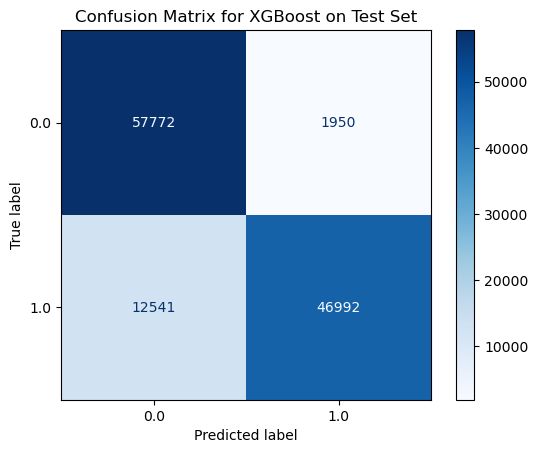

In [354]:
confusion_mat(xgb,X_test,y_test,'XGBoost')


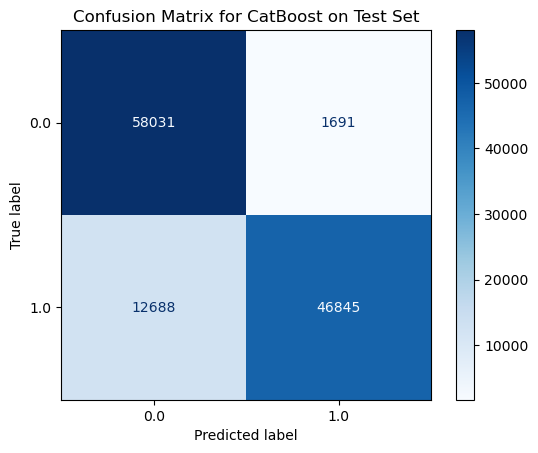

In [355]:
confusion_mat(catb,X_test,y_test,'CatBoost')

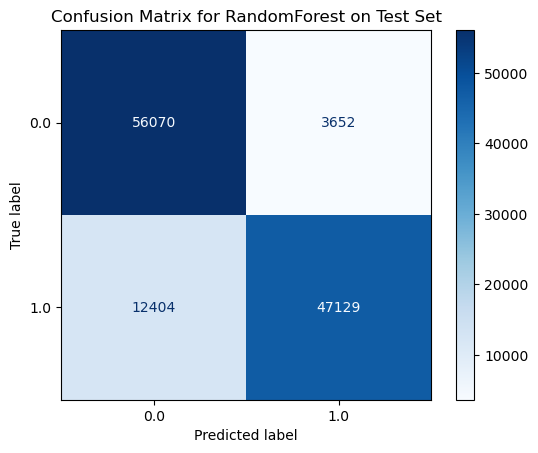

In [356]:
confusion_mat(randf,X_test,y_test,'RandomForest')

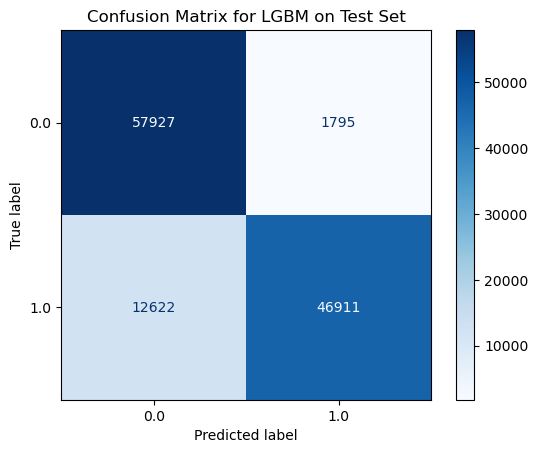

In [357]:
confusion_mat(lgbm,X_test,y_test,'LGBM')

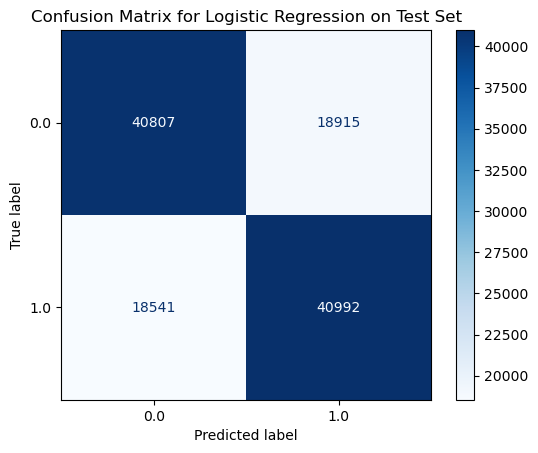

In [358]:
confusion_mat(lreg,X_test,y_test,'Logistic Regression')

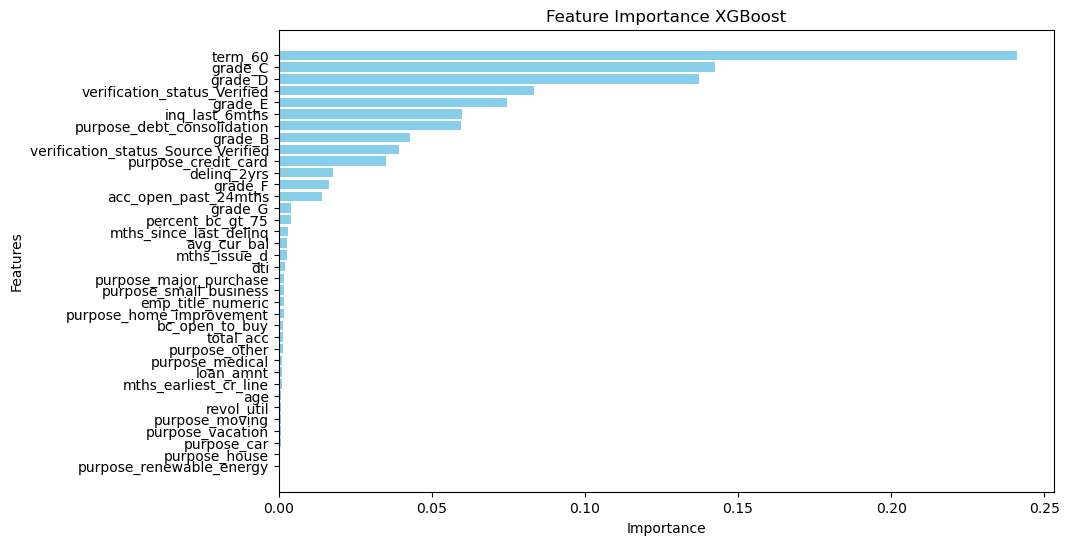

In [359]:
features_select(xgb,X,'XGBoost')

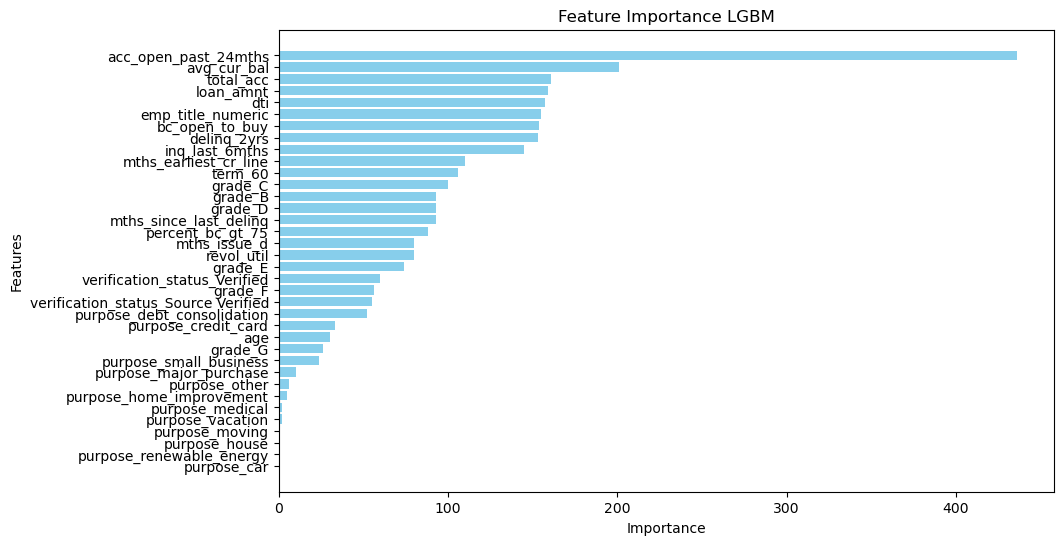

In [360]:
features_select(lgbm,X,'LGBM')

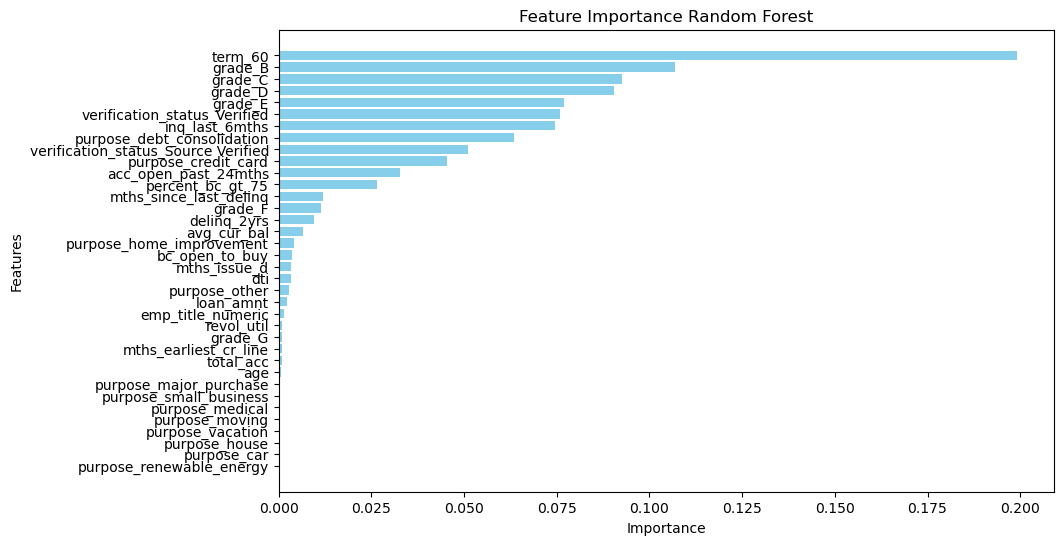

In [362]:
features_select(randf,X,'Random Forest')

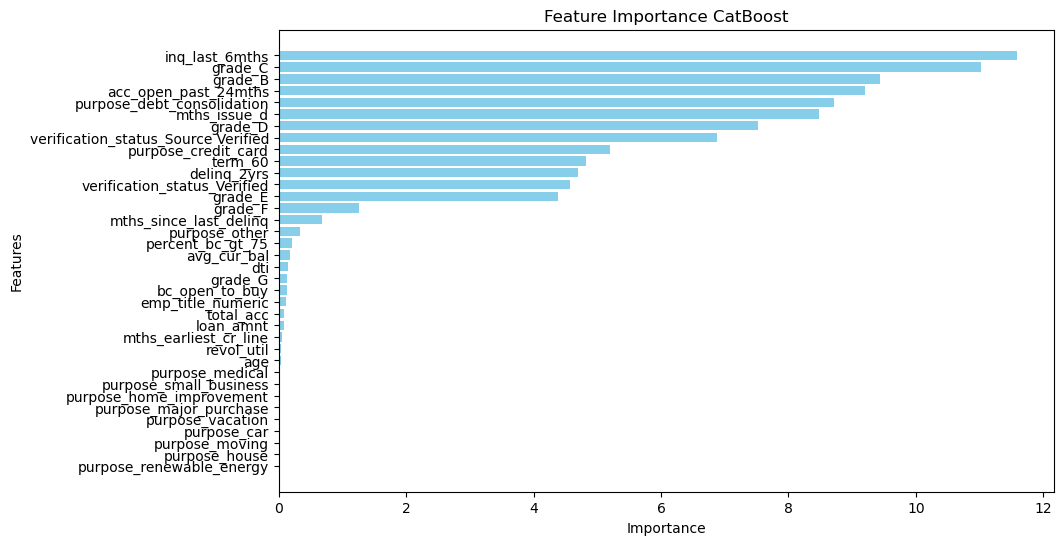

In [363]:
features_select(catb,X,'CatBoost')

In [364]:
ann,fpr_ANN, tpr_ANN, roc_auc_ANN,precision,accuracy,recall,f1,aucpr,aucroc=ANN(X_train, X_test, y_train, y_test)
print(f"{'Model':<20} | {'Precision':<10} | {'Accuracy':<10} |{'Recall':<10} | {'F1 Score':<10} | {'AUCPR':<10} | {'AUC-ROC':<10}")
print(f"{'ANN':<10} | {precision:<10.2f} | {accuracy:<10.2f} |{recall:<10.2f} | {f1:<10.2f} | {aucpr:<10.2f} | {aucroc:<10.2f}")

2024-10-03 12:44:18.149359: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
932/932 [==============================] - 38s 39ms/step - loss: 0.4659 - accuracy: 0.7696 - val_loss: 0.3880 - val_accuracy: 0.8131
Epoch 2/10
932/932 [==============================] - 46s 49ms/step - loss: 0.3736 - accuracy: 0.8214 - val_loss: 0.3554 - val_accuracy: 0.8326
Epoch 3/10
932/932 [==============================] - 36s 38ms/step - loss: 0.3552 - accuracy: 0.8312 - val_loss: 0.3422 - val_accuracy: 0.8397
Epoch 4/10
932/932 [==============================] - 37s 40ms/step - loss: 0.3447 - accuracy: 0.8375 - val_loss: 0.3348 - val_accuracy: 0.8426
Epoch 5/10
932/932 [==============================] - 32s 35ms/step - loss: 0.3419 - accuracy: 0.8390 - val_loss: 0.3337 - val_accuracy: 0.8446
Epoch 6/10
932/932 [==============================] - 36s 38ms/step - loss: 0.3371 - accuracy: 0.8412 - val_loss: 0.3341 - val_accuracy: 0.8430
Epoch 7/10
932/932 [==============================] - 40s 43ms/step - loss: 0.3360 - accuracy: 0.8424 - val_loss: 0.3336 - val_accuracy:

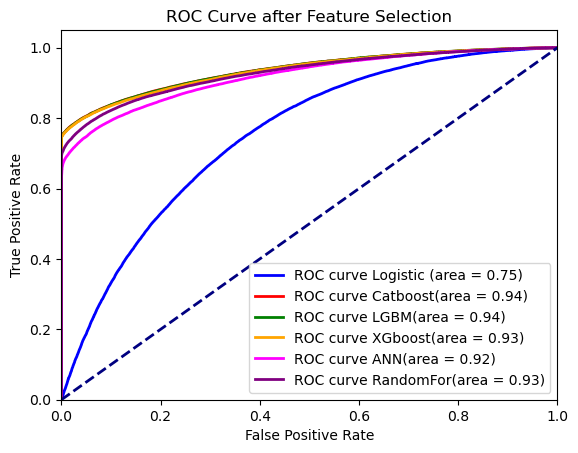

In [365]:

plt.figure()
plt.plot(fpr_Log, tpr_Log, color='blue', lw=2, label=f'ROC curve Logistic (area = {roc_auc_Log:.2f})')
plt.plot(fpr_Catboost, tpr_Catboost, color='red', lw=2, label=f'ROC curve Catboost(area = {roc_auc_Catboost:.2f})')
plt.plot(fpr_LGBM, tpr_LGBM, color='green', lw=2, label=f'ROC curve LGBM(area = {roc_auc_LGBM:.2f})')
plt.plot(fpr_XG, tpr_XG, color='orange', lw=2, label=f'ROC curve XGboost(area = {roc_auc_XG:.2f})')
plt.plot(fpr_ANN, tpr_ANN, color='magenta', lw=2, label=f'ROC curve ANN(area = {roc_auc_ANN:.2f})')
plt.plot(fpr_RF, tpr_RF, color='purple', lw=2, label=f'ROC curve RandomFor(area = {roc_auc_RF:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after Feature Selection')
plt.legend(loc='lower right')
plt.show()